# Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Q1. Detecting Fraud

# Problem Statment 


## Use decision trees to prepare a model on fraud data  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Data Description :

- Undergrad : person is under graduated or not (YES and NO)

- Marital.Status : marital status of a person (Single, Married, Divorced)

- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government (Numerical)

- Work Experience : Work experience of an individual person (Numerical--> years)

- Urban : Whether that person belongs to urban area or not (Yes and NO)

- City Population : Count of people living in the city

In [2]:
#load the data from the github repos
df_fraud=pd.read_csv("https://raw.githubusercontent.com/AliHumadi2000/Decision-Tree/main/Fraud_check.csv")

In [3]:
# see the first 5 columns 
df_fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data exploring and understanding 

In [4]:
# see the info of the data
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# shape of the data
[r,c]=df_fraud.shape
print("Fraud data had ",r," Rows")
print("Fraud data had ",c," Columns")

Fraud data had  600  Rows
Fraud data had  6  Columns


#  Basic statastic of the numerical Attribute 


In [6]:
df_fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


# Check if we have missing value or duplicated 

In [7]:
df_fraud.isna().sum()# no missing value 

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df_fraud.duplicated().sum() # no duplicated value 

0

# Data processing and visulization

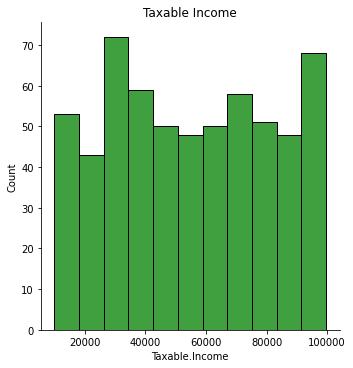

In [9]:
# see how the data of the attibute Taxable.Income ,City.Population and Work.Experience distributed
sns.displot(df_fraud['Taxable.Income'],color='green').set(title="Taxable Income")
plt.show()
#data is not normaly distributed 

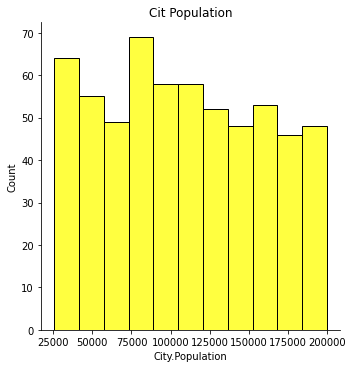

In [10]:

sns.displot(df_fraud['City.Population'],color='yellow').set(title="Cit Population")
plt.show()

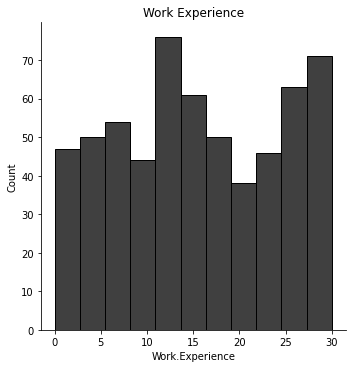

In [11]:

sns.displot(df_fraud['Work.Experience'],color='black').set(title="Work Experience")
plt.show()

# Check form outliers

<AxesSubplot:>

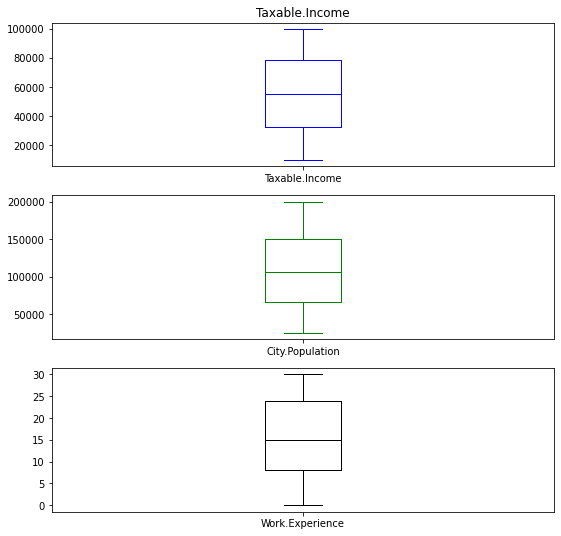

In [12]:
plt.figure(figsize=(9,9))
plt.subplot(3,1,1)
# Outliers Check
plt.title('Taxable.Income')
df_fraud['Taxable.Income'].plot(kind='box',color='blue')
plt.subplot(3,1,2)

df_fraud['City.Population'].plot(kind='box',color='green')
plt.subplot(3,1,3)

df_fraud['Work.Experience'].plot(kind='box',color='black')

# The data has no outliers
## encoding the catagorical features

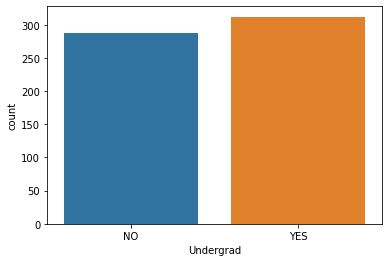

In [13]:
#see how many undrgrad is there in the data 
sns.countplot(df_fraud['Undergrad'])
plt.show()

In [14]:
df_fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

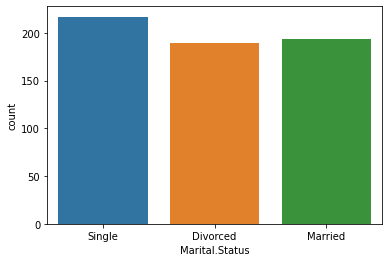

In [15]:
#see how many single ,married and divorce in the data 
sns.countplot(df_fraud['Marital.Status'])
plt.show()

In [16]:
df_fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

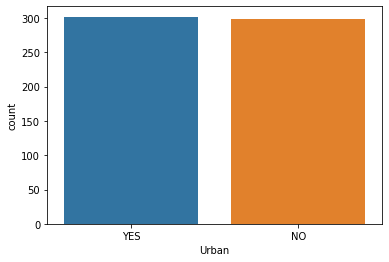

In [17]:
sns.countplot(df_fraud['Urban'])
plt.show()

In [18]:
df_fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [19]:
# Encoding the categorical data
label_encoder=preprocessing.LabelEncoder()
#change the name 
df_fraud['Undergrad']=label_encoder.fit_transform(df_fraud['Undergrad'])
df_fraud['Undergrad']

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

In [20]:
df_fraud['Marital.Status']=label_encoder.fit_transform(df_fraud['Marital.Status'])
df_fraud['Marital.Status']

0      2
1      0
2      1
3      2
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: Marital.Status, Length: 600, dtype: int32

In [21]:
df_fraud['Urban']=label_encoder.fit_transform(df_fraud['Urban'])
df_fraud['Urban']

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

# Data is ready

In [22]:
df_fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In this data the Target variable--> Taxable income is a continuos data, we have to convert it into categorical based on the given condition.

If Taxable Income<= 30000 label it as "Risky", otherwise label it as "Good"

In [23]:
df_fraud['Taxable.Income']=np.where(df_fraud['Taxable.Income']<=30000,'Risky','Good')

In [24]:
df_fraud.sample(20)  

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
32,1,1,Good,51911,23,0
331,1,1,Risky,60999,15,1
444,1,2,Risky,36956,14,0
276,0,2,Good,44251,17,1
488,1,2,Good,76718,10,1
524,1,1,Risky,164391,27,0
571,0,2,Good,95421,7,1
163,1,0,Risky,91851,15,1
156,1,1,Good,125987,3,1
152,0,2,Risky,91889,16,0


In [25]:
#change the positon of the target vara 
df_fraud['Taxable Income']=df_fraud['Taxable.Income']
df_fraud.drop(columns='Taxable.Income',inplace=True,axis=1)
df_fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [26]:
df_fraud.sample(10)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable Income
585,0,2,137622,2,1,Good
415,0,0,131493,21,0,Good
572,1,1,148068,13,0,Good
97,1,0,37849,19,1,Good
592,1,2,75143,16,0,Good
414,0,0,27300,1,1,Good
5,0,0,116382,0,0,Good
278,0,1,114823,11,0,Risky
221,1,2,134135,14,0,Good
345,1,0,118798,6,0,Good


In [27]:
# Checking the correlation
corr=df_fraud.corr()
corr

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000


# Correlation between features

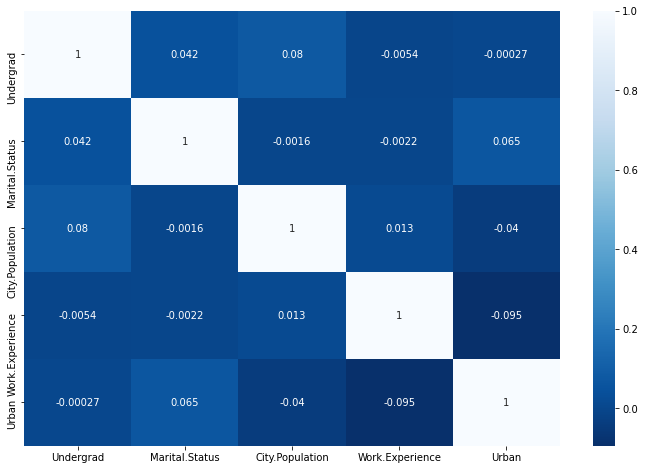

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='Blues_r')
plt.show()

The features are having very low correlation

In [29]:
# Splitting the features and target variable
x=df_fraud.iloc[:,:-1]
y=df_fraud.iloc[:,-1]

In [30]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [31]:
y.value_counts()

Good     476
Risky    124
Name: Taxable Income, dtype: int64

In [32]:
# Splitting the data into Training and Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
# Creating the model
DT=DecisionTreeClassifier(criterion='entropy',min_samples_split=5,random_state=1)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=1)

In [34]:
# Testing the model on training data
y_train_pred=DT.predict(x_train)

In [35]:
print("accuracy is ",accuracy_score(y_train,y_train_pred))

accuracy is  0.95


The accuracy is high for the training data because Decision Tree has the problem of Overfitting of the data and hence it tends to remember the entire training data.

In [36]:
confusion_matrix(y_train,y_train_pred)

array([[370,   6],
       [ 18,  86]], dtype=int64)

In [37]:
# Testing the model on testing data
y_test_pred=DT.predict(x_test)

In [38]:
accuracy_score(y_test,y_test_pred)

0.6666666666666666

In [39]:
confusion_matrix(y_test,y_test_pred)

array([[78, 22],
       [18,  2]], dtype=int64)

In [40]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        Good       0.81      0.78      0.80       100
       Risky       0.08      0.10      0.09        20

    accuracy                           0.67       120
   macro avg       0.45      0.44      0.44       120
weighted avg       0.69      0.67      0.68       120



In [41]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
result

,Actual,Predicted
195,Good,Good
155,Good,Good
40,Good,Good
212,Good,Good
52,Good,Good
...,...,...
343,Good,Good
163,Risky,Good
565,Good,Good
426,Good,Good


# The accuracy on the test data is 67% 

# Tree Plot

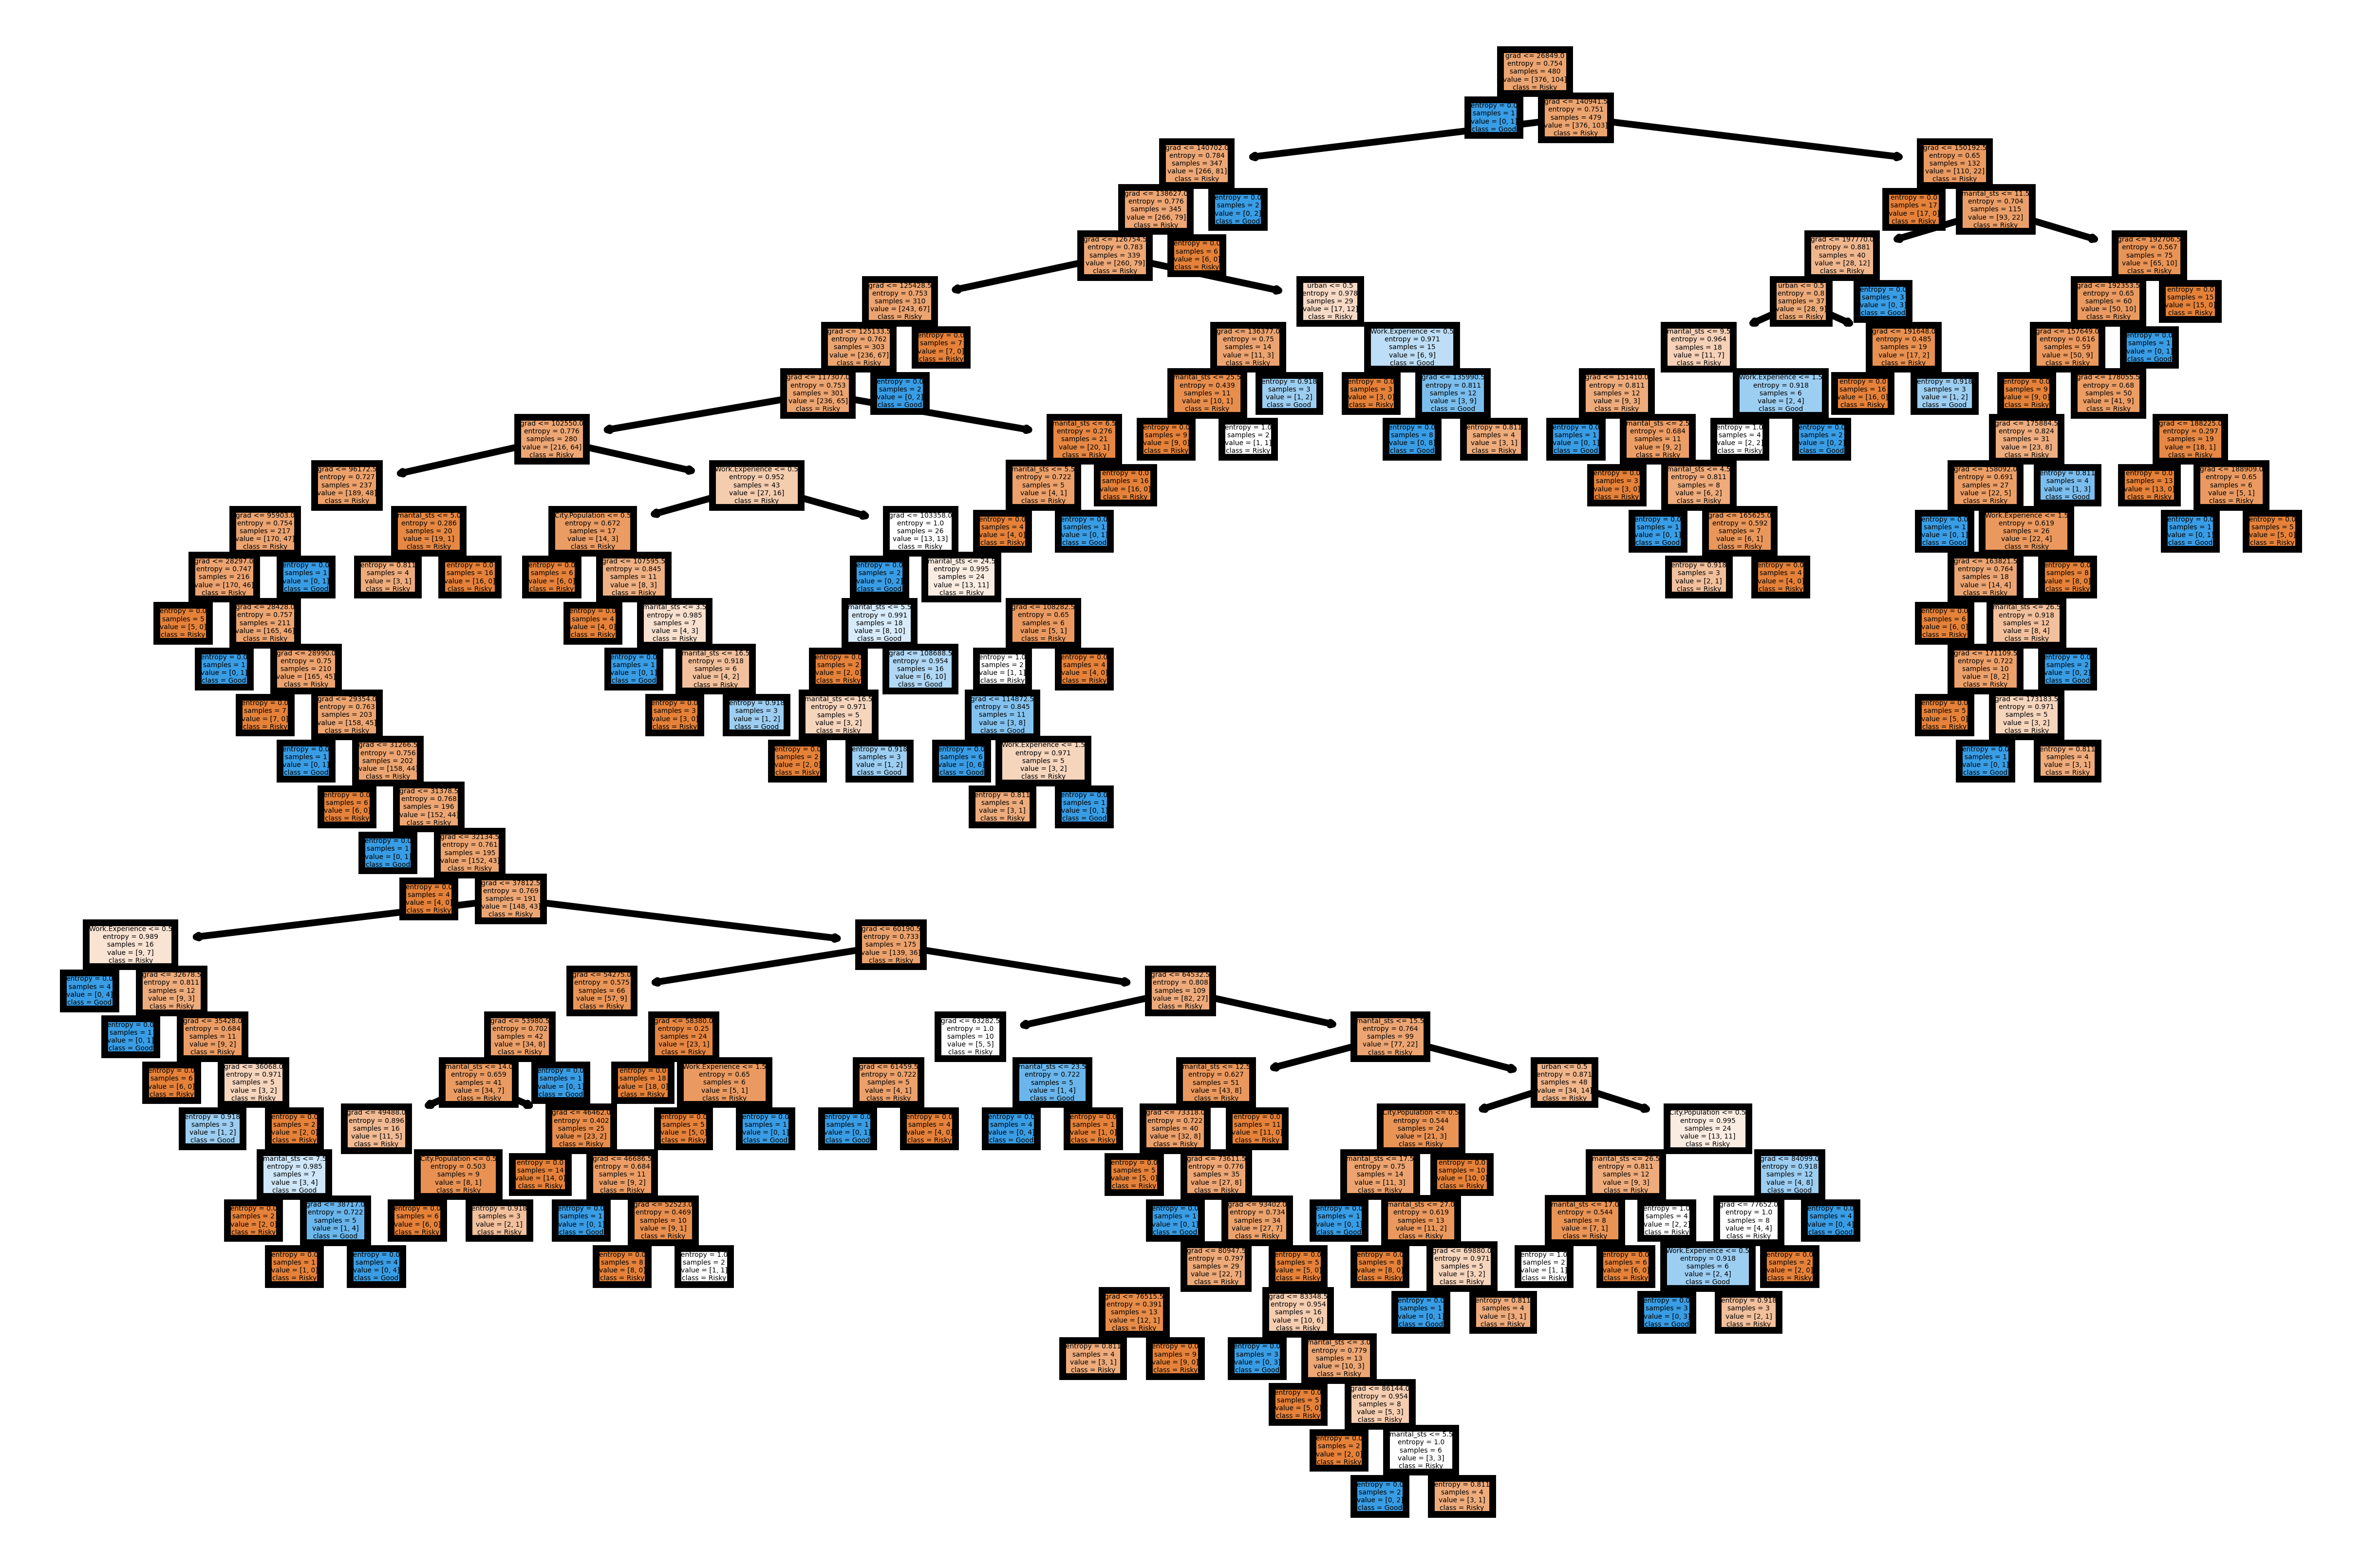

In [42]:
# Plot the tree
fn=['City.Population','Work.Experience','grad','marital_sts','urban']
cn=['Risky','Good']
plt.figure(dpi=1000);
tree.plot_tree(DT,feature_names=fn,class_names=cn,filled=True);

In [43]:
# Feature Importance
DT.feature_importances_

array([0.03215637, 0.08912601, 0.62707134, 0.21395337, 0.03769292])

In [44]:
fi=pd.DataFrame({'Features':list(x_train.columns),'Importance':DT.feature_importances_})
fi.sort_values('Importance',ascending=False)

,Features,Importance
2,City.Population,0.627071
3,Work.Experience,0.213953
1,Marital.Status,0.089126
4,Urban,0.037693
0,Undergrad,0.032156


# The City Population feature has the highest importance.
# and the undergrad has the lowest importance

# Q2. Company data

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

The attributes are as follows:

1. Sales -- Unit sales (in thousands) at each location

2. Competitor Price -- Price charged by competitor at each location

3. Income -- Community income level (in thousands of dollars)

4. Advertising -- Local advertising budget for company at each location (in thousands of dollars)

5. Population -- Population size in region (in thousands)

6. Price -- Price company charges for car seats at each site

7. Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site.

8. Age -- Average age of the local population

9. Education -- Education level at each location

10. Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

11. US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [45]:
df_company=pd.read_csv("https://raw.githubusercontent.com/AliHumadi2000/Decision-Tree/main/Company_Data.csv")

 # Data Exploeing and understanding
 

In [46]:
df_company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [47]:
df_company.shape# 400 rows and 11 columns

(400, 11)

In [48]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [49]:
df_company.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


# Check if there is null or duplicated values

In [50]:
df_company.isna().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [51]:
df_company.duplicated().sum()

0

In [52]:
# Correlation table
correlation=df_company.corr()
correlation

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


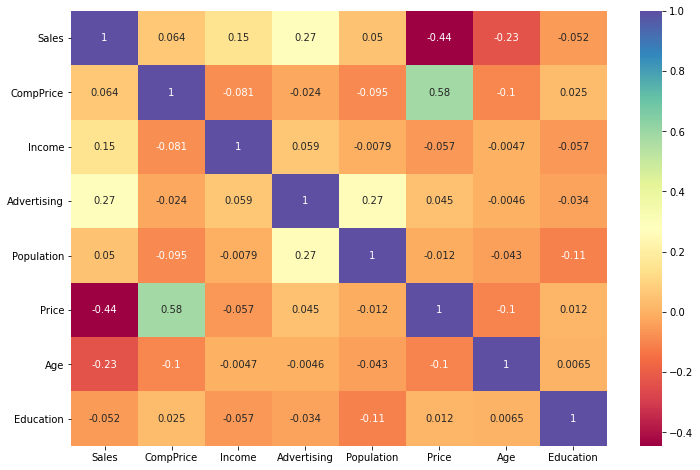

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap='Spectral')
plt.show()

no coleanirety between features


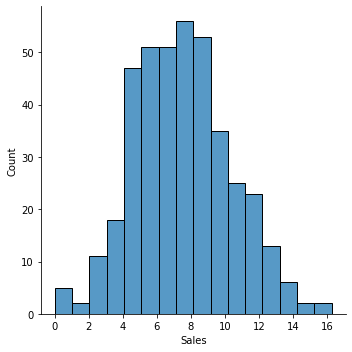

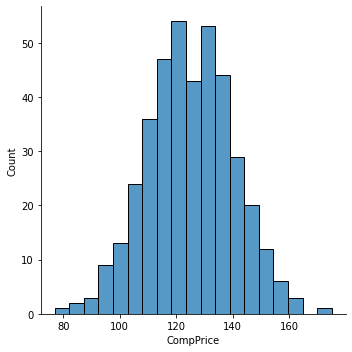

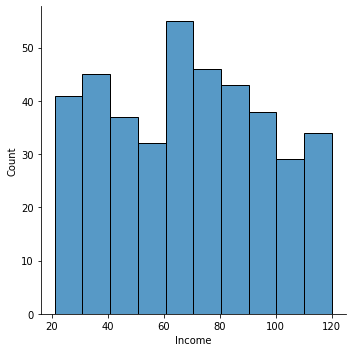

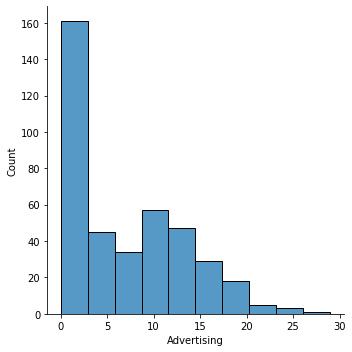

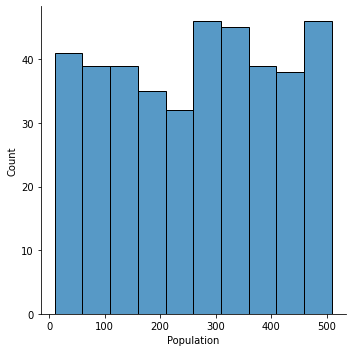

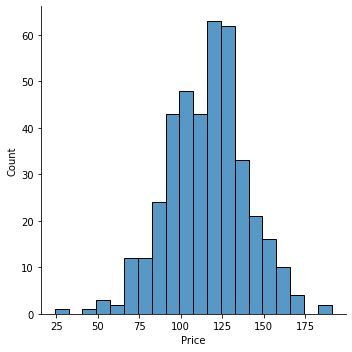

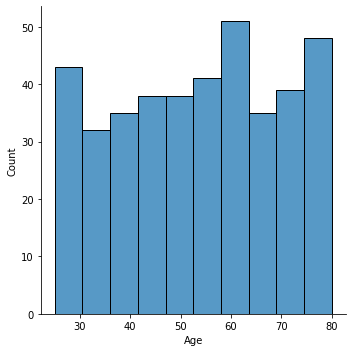

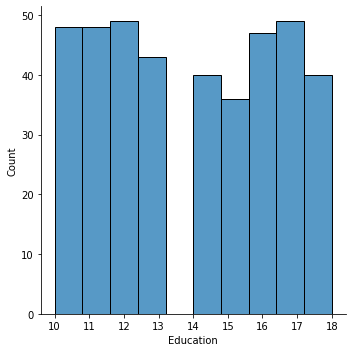

In [54]:
#see the distribution of the numeric data 
n=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education']
for i in n:
    sns.displot(df_company[i])

    #sales ,compPrince and price is nearly to normal distribution

# Check from the outliers 



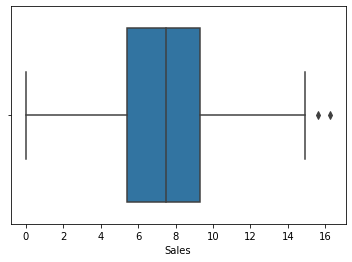

In [55]:
sns.boxplot(df_company[n[0]])
plt.show()

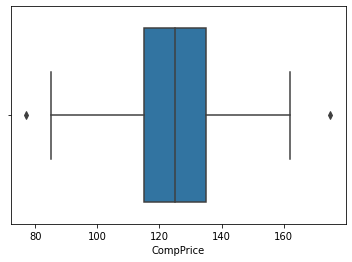

In [56]:
sns.boxplot(df_company[n[1]])
plt.show()

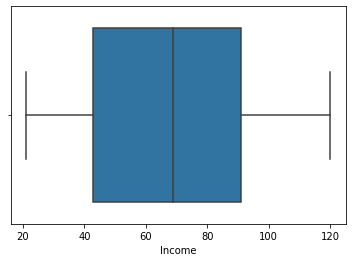

In [57]:
sns.boxplot(df_company[n[2]])
plt.show()

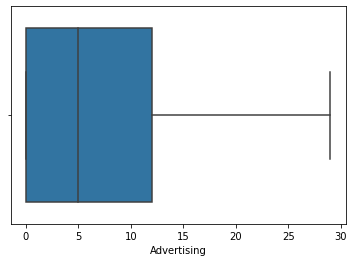

In [58]:
sns.boxplot(df_company[n[3]])
plt.show()

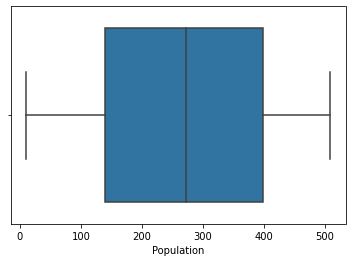

In [59]:
sns.boxplot(df_company[n[4]])
plt.show()

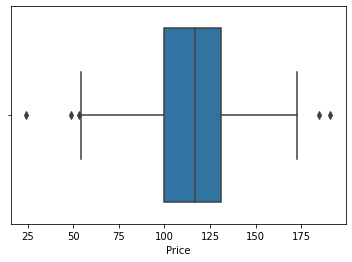

In [60]:
sns.boxplot(df_company[n[5]])
plt.show()

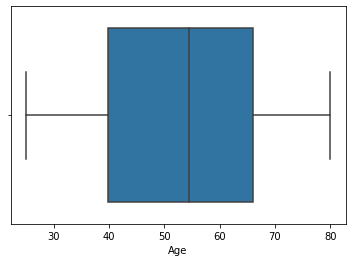

In [61]:
sns.boxplot(df_company[n[6]])
plt.show()

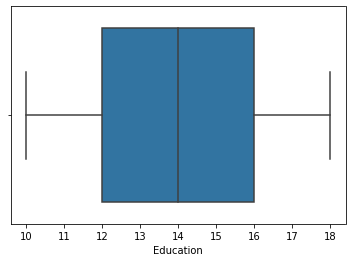

In [62]:
sns.boxplot(df_company[n[7]])
plt.show()

There are no much outliers present 

In [63]:
df_company=pd.get_dummies(df_company)

In [64]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    uint8  
 9   ShelveLoc_Good    400 non-null    uint8  
 10  ShelveLoc_Medium  400 non-null    uint8  
 11  Urban_No          400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_No             400 non-null    uint8  
 14  US_Yes            400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(7)
memory usage: 27.9 KB


# Converting the target variable from continuos to categorical data based on the "Median" 

# If Sales <= 7.49 --> 'Low' Sales value, If Sales > 7.49--> 'High' Sales value
   

In [65]:
df_company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [66]:
df_company['Sales']=np.where(df_company['Sales']<=7.49,'Low','High')

In [67]:
df_company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,High,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,High,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,High,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Low,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Low,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Low,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Low,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Low,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [68]:
# Splitting features and target variable

X=df_company.iloc[:,1:]
Y=df_company.iloc[:,0:1]

In [69]:
# Splitting the data into training and testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1234)

In [70]:
X_train.shape

(280, 14)

In [71]:
X_test.shape

(120, 14)

In [72]:
# Model creation
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,random_state=8)
model.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=8)

In [73]:
# Testing model on training data
Y_train_pred=model.predict(X_train)
accuracy_score(Y_train,Y_train_pred)

0.9678571428571429

In [74]:
confusion_matrix(Y_train,Y_train_pred)

array([[142,   3],
       [  6, 129]], dtype=int64)

In [75]:
# Testing the model on test data
Y_test_pred=model.predict(X_test)
accuracy_score(Y_test,Y_test_pred)

0.7583333333333333

In [76]:
confusion_matrix(Y_test,Y_test_pred)

array([[40, 14],
       [15, 51]], dtype=int64)

In [77]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

        High       0.73      0.74      0.73        54
         Low       0.78      0.77      0.78        66

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120



# The Accuracy on test data is 76%

# Tree Plot

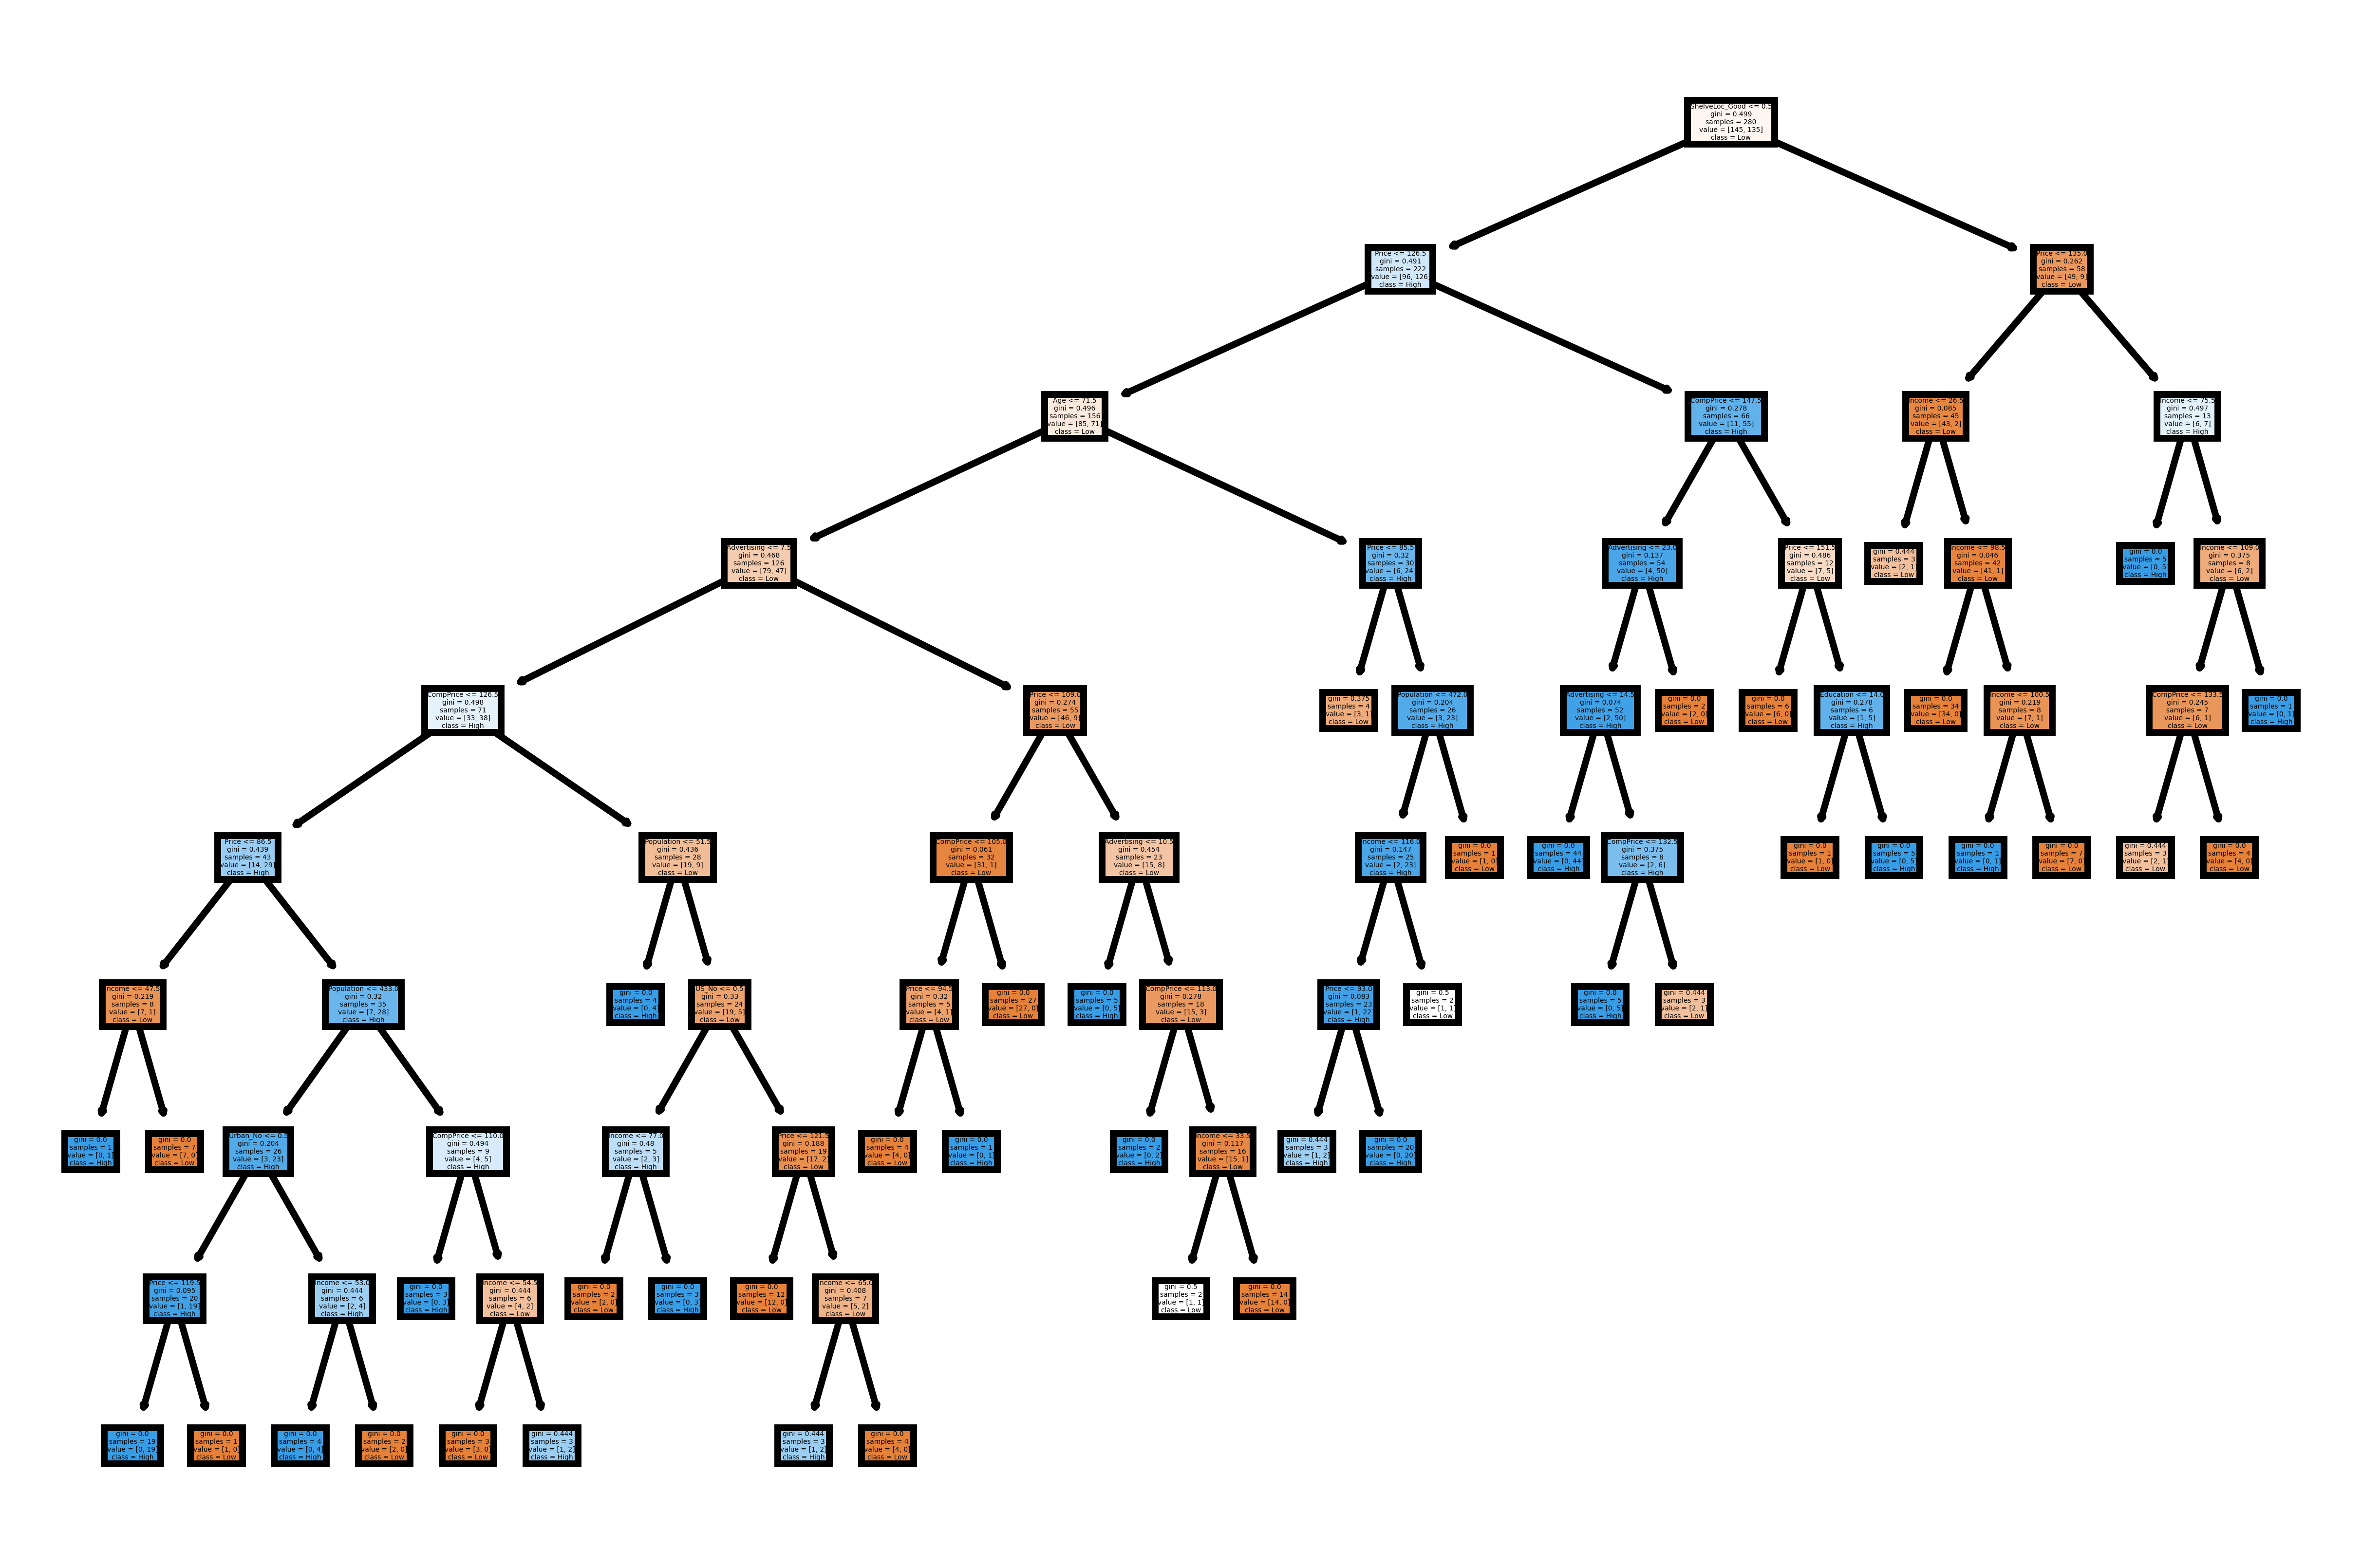

In [78]:
f_n=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
c_n=['Low','High']
plt.figure(dpi=1000);
tree.plot_tree(model,feature_names=f_n,class_names=c_n,filled=True);

In [79]:
# Feature Importance
model.feature_importances_

array([0.12941273, 0.14457373, 0.14339155, 0.05745864, 0.30055349,
       0.06885278, 0.01298822, 0.        , 0.12189359, 0.        ,
       0.00577476, 0.        , 0.01510051, 0.        ])

In [80]:
FI=pd.DataFrame({'Features':list(X_train.columns),'Importance':model.feature_importances_})
FI.sort_values('Importance',ascending=False)

,Features,Importance
4,Price,0.300553
1,Income,0.144574
2,Advertising,0.143392
0,CompPrice,0.129413
8,ShelveLoc_Good,0.121894
5,Age,0.068853
3,Population,0.057459
12,US_No,0.015101
6,Education,0.012988
10,Urban_No,0.005775


As we can see the "Price" feature has highest importance.